In [2]:
import pandas as pd
import numpy as np

# 데이터 열기

In [3]:
data = pd.read_excel("./data/eBayAuctions.xls")

In [4]:
data.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [5]:
data.tail()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1
1971,Automotive,US,145,7,Sat,999.00,999.00,0


## 결측치 확인

In [6]:
data.isnull().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [7]:
data.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926026,0.540568
std,5973.011033,2.052906,89.493858,38.856214,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


# 변수변환
1. Competitive?의 이름 바꾸기
2. Competitive : 범주형으로 변환하기
3. Duration : 범주형으로 변환하기

In [8]:
data = data.rename(columns={'Competitive?' : 'Competitive'})

In [9]:
data['Competitive'] = data['Competitive'].astype('category')

In [14]:
data['Duration'] = data['Duration'].astype('category')

# EDA 수행

1. 범주형 변수 / 수치형 변수 구분 
2. 범주형 변수에서 level 확인
3. 수치형 변수의 히스토그램, 박스플롯 그리기

In [16]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

## 범주형 / 수치형 구분

In [17]:
numeric = data.select_dtypes(include = np.number)
category = data.select_dtypes(exclude = np.number)

In [18]:
numeric_list = numeric.columns.tolist()
category_list = category.columns.tolist()

## 범주형 변수

### level 확인

In [19]:
print(category_list)

['Category', 'currency', 'Duration', 'endDay', 'Competitive']


In [20]:
data['Category'].value_counts()

Category
Music/Movie/Game        403
Collectibles            239
Toys/Hobbies            234
Automotive              178
Antique/Art/Craft       177
SportingGoods           124
Clothing/Accessories    119
Home/Garden             102
Jewelry                  82
Health/Beauty            64
Electronics              55
Books                    54
Coins/Stamps             37
Computer                 36
Pottery/Glass            20
Business/Industrial      18
EverythingElse           17
Photography              13
Name: count, dtype: int64

In [21]:
data['currency'].value_counts()

currency
US     1292
EUR     533
GBP     147
Name: count, dtype: int64

In [24]:
data['Duration'].value_counts()

Duration
7     967
5     466
10    303
3     213
1      23
Name: count, dtype: int64

In [22]:
data['endDay'].value_counts()

endDay
Mon    548
Sat    351
Sun    338
Fri    287
Thu    202
Tue    171
Wed     75
Name: count, dtype: int64

In [23]:
data['Competitive'].value_counts()

Competitive
1    1066
0     906
Name: count, dtype: int64

### 도수분포표

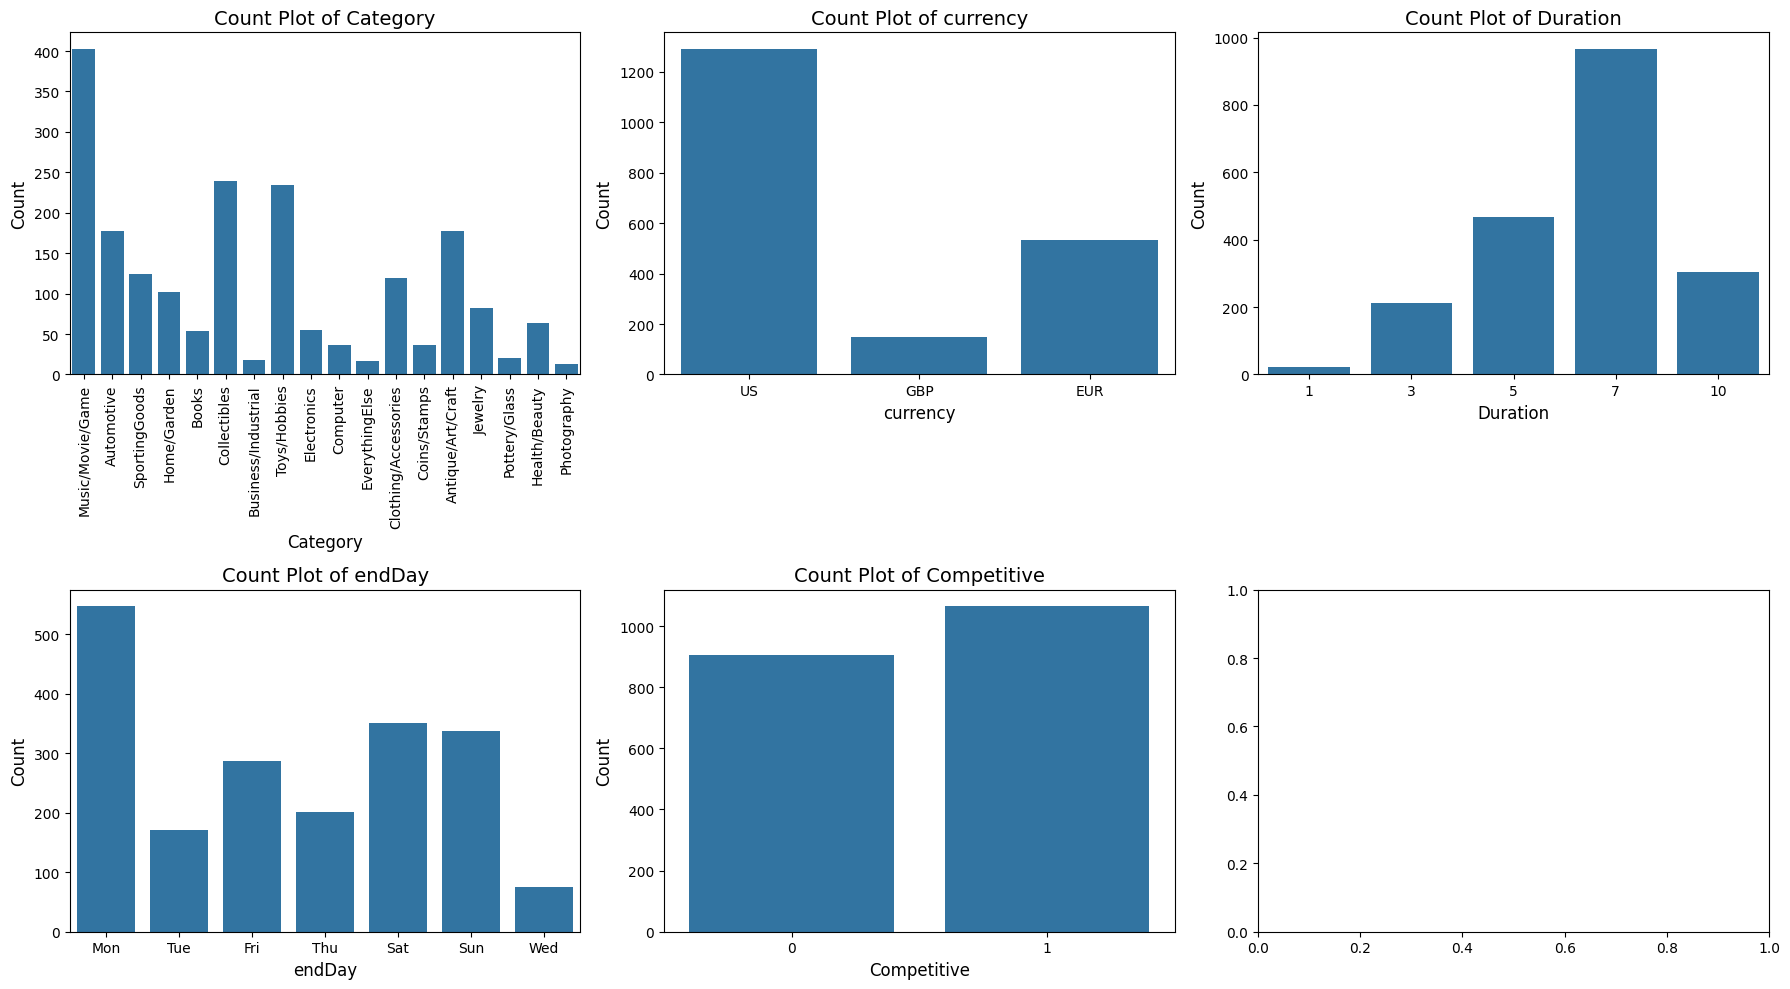

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(category_list):
	sns.countplot(x = var, data = data, ax = axes[i])
	axes[i].set_title(f'Count Plot of {var}', fontsize=14)
	axes[i].set_xlabel(var, fontsize = 12)
	axes[i].set_ylabel('Count', fontsize = 12)
	if var == 'Category':
		axes[i].tick_params(axis='x', rotation = 90)

plt.tight_layout()
plt.show()


## 수치형 변수

In [43]:
numeric_list

['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice']

### 히스토그램

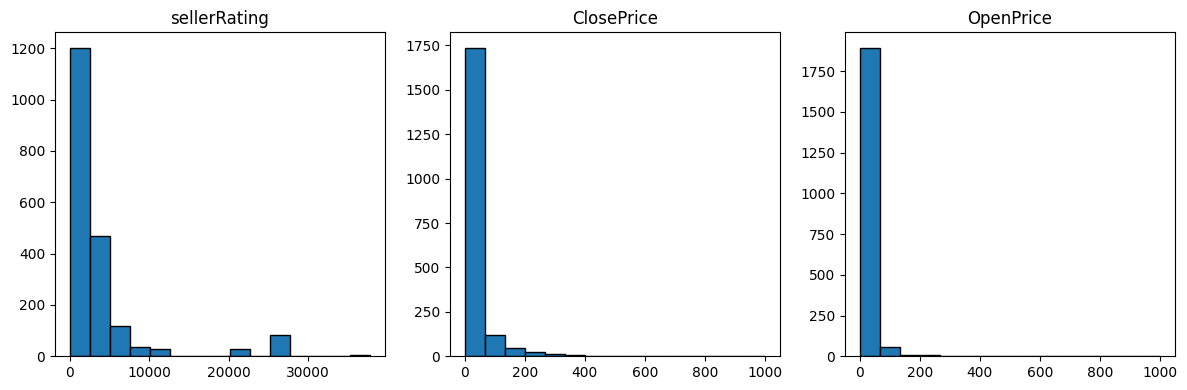

In [29]:
plt.figure(figsize = (12, 4))

for i, var in enumerate(numeric_list, start = 1):
	plt.subplot(1, 3, i)
	plt.hist(data[var], bins = 15, edgecolor = 'black')
	plt.title(f'{var}')
plt.tight_layout()
plt.show()

### 상관관계 파악

In [30]:
data[numeric_list].corr()

,sellerRating,ClosePrice,OpenPrice
sellerRating,1.000000,0.000158,-0.041111
ClosePrice,0.000158,1.000000,0.476932
OpenPrice,-0.041111,0.476932,1.000000


### 박스플롯 그리기

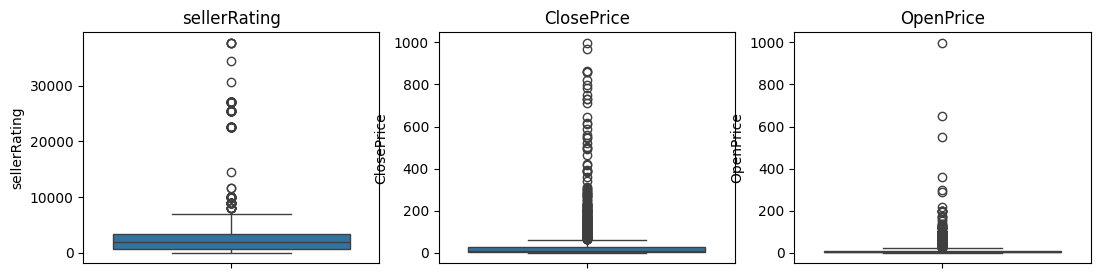

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (13, 3))
axes = axes.flatten()
for i, var in enumerate(numeric_list, start = 0):
	sns.boxplot(y = var, data = data, ax = axes[i])
	axes[i].set_title(f"{var}")
	axes[i].set_ylabel(var)

## 결론
* 수치형 변수에서 이상치에 해당하는 값 발생.
* sellerRating, Closeprice, OpenPrice에 각각 이상치에 해당하는 값 발생.
* 어떻게 처리할지 고민해야 함.